Dataset:
link https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data

A business manager of a consumer credit card portfolio is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.

| No.| Column      | Description |
| -- | ----------- | ----------- |
| 1. | CLIENTNUM | Client number. Unique identifier for the customer holding the account |
| 2. | Attrition_Flag | Internal event (customer activity) variable - if the account is closed then 1 else 0 |
| 3. | Customer_Age   | Customer's Age in Years |
| 4. | Gender | M=Male, F=Female |
| 5. | Dependent_count | Number of dependents - people who are financially (and otherwise) dependent on you.|
| 6. | Education_Level | Educational Qualification of the account holder (example: high school, college graduate, etc.) |
| 7. |Marital_Status| Married, Single, Divorced, Unknown |
| 8. | Income_Category | Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >) |
| 9. | Card_Category | Type of Card (Blue, Silver, Gold, Platinum) |
| 10. | Months_on_book | Period of relationship with bank |
| 11. |Total_Relationship_Count| Total no. of products held by the customer |
| 12. | Months_Inactive_12_mon | No. of months inactive in the last 12 months |
| 13. | Contacts_Count_12_mon | No. of Contacts in the last 12 months |
| 14. | Credit_Limit | Credit Limit on the Credit Card |
| 15. | Total_Revolving_Bal | Total Revolving Balance on the Credit Card |
| 16. | Avg_Open_To_Buy | Open to Buy Credit Line (Average of last 12 months) |
| 17. | Total_Amt_Chng_Q4_Q1 | Change in Transaction Amount (Q4 over Q1) |
| 18. | Total_Trans_Amt | Total Transaction Amount (Last 12 months) |
| 19. | Total_Trans_Ct | Total Transaction Count (Last 12 months) |
| 20. | Total_Ct_Chng_Q4_Q1 | Change in Transaction Count (Q4 over Q1) |
| 21. | Avg_Utilization_Ratio | Average Card Utilization Ratio |

In [12]:
#libraries
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv('input_data/BankChurners.csv')
data = data[data.columns[:-2]]
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
print(data.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
data.describe(include=['O'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


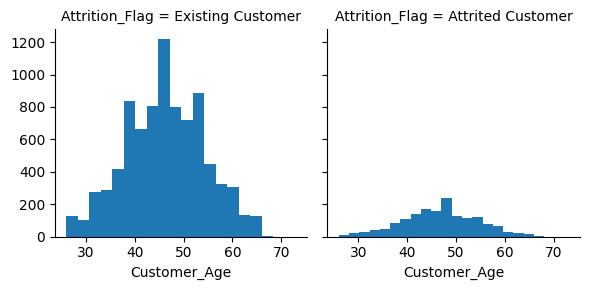

In [8]:
g = sns.FacetGrid(data, col='Attrition_Flag')
g.map(plt.hist, 'Customer_Age', bins=20)

<Axes: xlabel='Customer_Age', ylabel='Count'>

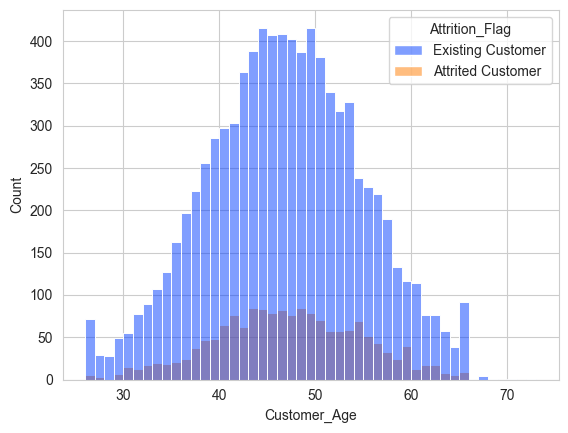

In [9]:
# plt.figure(figsize=(15,6))
sns.set_style("whitegrid",{'font_scale':'1.6'})
sns.histplot(data=data,x="Customer_Age",hue="Attrition_Flag",palette="bright")
#lepiej korzystac z SNS, ta biblioteka jest nowsza niz plt i wyglada "lepiej"
#wiecej o kolorach w SNS: https://seaborn.pydata.org/tutorial/color_palettes.html

<Axes: xlabel='Customer_Age', ylabel='Density'>

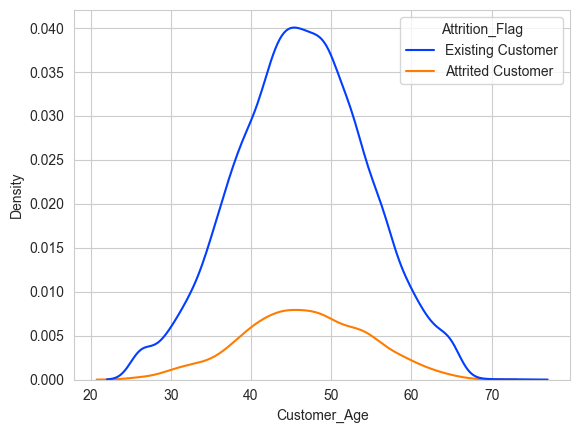

In [10]:
# plt.figure(figsize=(15,6))
sns.set_style("whitegrid",{'font_scale':'1.6'})
sns.kdeplot(data=data,x="Customer_Age",hue="Attrition_Flag",palette="bright")

<Axes: xlabel='Gender', ylabel='Count'>

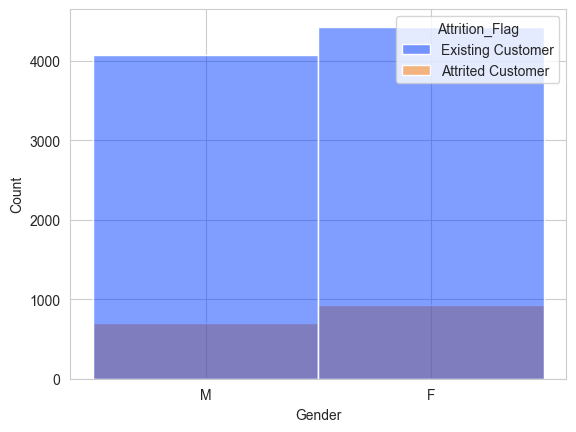

In [11]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
sns.histplot(data=data,x="Gender",hue="Attrition_Flag",palette="bright")

array([[<Axes: title={'center': 'CLIENTNUM'}>,
        <Axes: title={'center': 'Customer_Age'}>,
        <Axes: title={'center': 'Dependent_count'}>,
        <Axes: title={'center': 'Months_on_book'}>],
       [<Axes: title={'center': 'Total_Relationship_Count'}>,
        <Axes: title={'center': 'Months_Inactive_12_mon'}>,
        <Axes: title={'center': 'Contacts_Count_12_mon'}>,
        <Axes: title={'center': 'Credit_Limit'}>],
       [<Axes: title={'center': 'Total_Revolving_Bal'}>,
        <Axes: title={'center': 'Avg_Open_To_Buy'}>,
        <Axes: title={'center': 'Total_Amt_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Total_Trans_Amt'}>],
       [<Axes: title={'center': 'Total_Trans_Ct'}>,
        <Axes: title={'center': 'Total_Ct_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Avg_Utilization_Ratio'}>, <Axes: >]],
      dtype=object)

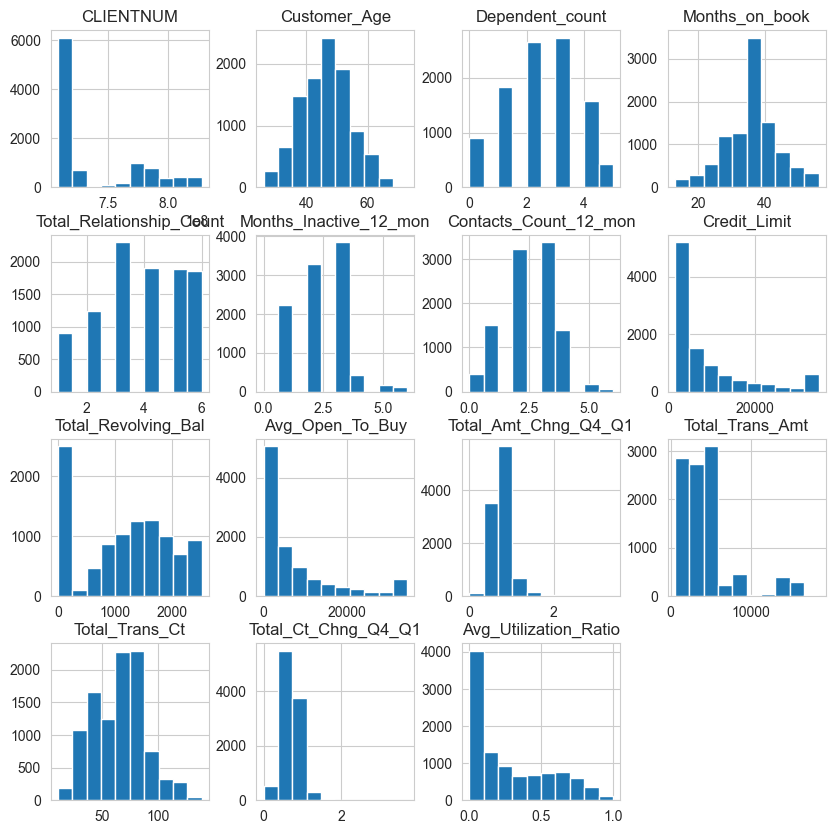

In [24]:
data.hist(figsize=(10,10))